# Data prepartion CubiCasa5K for all models and Improved Multi-Task Model for Floorplan Image Analysis

Paper: [CubiCasa5K: A Dataset and an Improved Multi-Task Model for Floorplan Image Analysis](https://arxiv.org/abs/1904.01920v1)

In this notebook we will prepare the cubicasa images for the different models and upload them to an S3 bucket for future use. 

## Multi-Task Model
After preparing the data we will the train and use the model from the paper. The model uses the neural network architecture presented in [Raster-to-Vector: Revisiting Floorplan Transformation](https://github.com/art-programmer/FloorplanTransformation) [1]. The pre- and post-processing parts are modified to suit our dataset, but otherwise the pipeline follows the torch implementation of [1] as much as possible. Our model utilizes the multi-task uncertainty loss function presented in [Multi-Task Learning Using Uncertainty to Weigh Losses for Scene Geometry and Semantics](https://arxiv.org/abs/1705.07115). An example of our trained model's prediction can be found in the samples.ipynb file.

## Dataset
CubiCasa5K is a large-scale floorplan image dataset containing 5000 samples annotated into over 80 floorplan object categories. The dataset annotations are performed in a dense and versatile manner by using polygons for separating the different objects. You can download the CubiCasa5K dataset from [here](https://zenodo.org/record/2613548) and extract the zip file to data/ folder.

## Requirements
The model is written for Python 3.6.5 and Pytorch 1.0.0 with CUDA enabled GPU run with conda_pytorch36 kernel



## update and speed up conda (this takes ~10min)

In [2]:
%%time
!conda install mamba -c conda-forge --yes


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.12
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/ec2-user/anaconda3/envs/pytorch_p36

  added / updated specs: 
    - mamba


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cryptography-2.8           |   py36h45558ae_2         628 KB  conda-forge
    curl-7.68.0                |       hf8cf82a_0         137 KB  conda-forge
    conda-4.8.3                |   py36h9f0ad1d_1         3.0 MB  conda-forge
    mamba-0.1.1                |   py36hdb11119_0         102 KB  conda-forge
    krb5-1.16.4                |       h2fd8d38_0         1.4 MB  conda-forge
    libcurl-7.68.0             |       hda55be3_0         564 KB  conda-forge
    libiconv-1.15              |    h516909a_1006   

## restart the kernel after the above mamba install. Mamba helps to speed up conda solver (solving environment spinning for ages) which wont have an effect unless you restart the kernel, the bel

In [8]:
%%time
!while read requirement; do REQUIREMENTS+=" ${requirement}"; done < conda.requirements.txt; echo "installing " $REQUIREMENTS; conda install --yes  -c anaconda -c conda-forge $REQUIREMENTS

installing  attrs==19.1.0 bleach==3.1.0 cloudpickle==0.8.0 Cython==0.29.6 dask==1.1.4 defusedxml==0.5.0 entrypoints==0.3 idna==2.7 jedi==0.13.3 Jinja2==2.10 joblib==0.13.2 jsonschema==3.0.1 pyparsing==2.3.1 pytz==2018.9 PyWavelets==1.0.2 scikit-image==0.14.2 testpath==0.4.2 visdom==0.1.8.5 websocket-client==0.54.0
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /home/ec2-user/anaconda3/envs/pytorch_p36

  added / updated specs:
    - attrs==19.1.0
    - bleach==3.1.0
    - cloudpickle==0.8.0
    - cython==0.29.6
    - dask==1.1.4
    - defusedxml==0.5.0
    - entrypoints==0.3
    - idna==2.7
    - jedi==0.13.3
    - jinja2==2.10
    - joblib==0.13.2
    - jsonschema==3.0.1
    - pyparsing==2.3.1
    - pytz==2018.9
    - pywavelets==1.0.2
    - scikit-image==0.14.2
    - testpath==0.4.2
    - visdom==0.1.8.5
    - websocket-client==0.54.0


The following packages will be downloade

In [3]:
!cat pip.requirements.txt

opencv-python==4.2.0.32
h5py-cache==1.0
shapely==1.7.0
protobuf==3.11.3
lmdb==0.94
torch==1.0.0
svgpathtools==1.3.3
svgwrite==1.3.1
tensorboardx==1.6

In [4]:
!pip install -r pip.requirements.txt

    100% |████████████████████████████████| 28.2MB 1.3MB/s eta 0:00:01
    100% |████████████████████████████████| 1.8MB 20.6MB/s ta 0:00:01
    100% |████████████████████████████████| 1.3MB 28.2MB/s ta 0:00:01
    100% |████████████████████████████████| 4.0MB 15.7MB/s ta 0:00:01
    100% |████████████████████████████████| 591.8MB 79kB/s  eta 0:00:01    68% |██████████████████████          | 407.9MB 58.5MB/s eta 0:00:04
    100% |████████████████████████████████| 51kB 25.0MB/s ta 0:00:01
    100% |████████████████████████████████| 71kB 32.5MB/s ta 0:00:01
    100% |████████████████████████████████| 133kB 42.4MB/s ta 0:00:01
  Running setup.py bdist_wheel for h5py-cache ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/f0/ce/3e/40128ad3a26c4737100842671c7006428f83b328232c210569
  Running setup.py bdist_wheel for lmdb ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/57/40/51/3fe10a4a559a91352579a27cbcca490f279bacb54209713c4b
Successfully built h5py-cache lm

In [ ]:
!conda install torchvision==0.2.1 --yes

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / 

### download data

In [5]:
DATA_DIR="./data"

In [6]:
!rm -rf {DATA_DIR}
!mkdir {DATA_DIR}

In [7]:
!curl --output casa5k.zip https://zenodo.org/record/2613548/files/cubicasa5k.zip


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 5216M  100 5216M    0     0  13.7M      0  0:06:19  0:06:19 --:--:-- 14.8M5216M    6  313M    0     0  10.1M      0  0:08:32  0:00:30  0:08:02 14.0M    0     0  12.2M      0  0:07:06  0:00:57  0:06:09 14.6M 5216M   22 1189M    0     0  13.1M      0  0:06:38  0:01:30  0:05:08 14.6M0:06:40  0:02:24  0:04:16 14.4M16M   63 3326M    0     0  13.3M      0  0:06:31  0:04:09  0:02:22 14.6M    0     0  13.6M      0  0:06:22  0:05:46  0:00:36 14.5M


In [8]:
from zipfile import ZipFile
file = "casa5k.zip"
with ZipFile(file, 'r') as zip:
  #zip.printdir()  
  # extracting all the files 
  print('Extracting all the files now...') 
  zip.extractall()

Extracting all the files now...


In [9]:
!mv ./cubicasa5k/ ./{DATA_DIR}

# Data preparation

## get CubiCasa5k repo and create database for images

In [10]:
!git clone https://github.com/CubiCasa/CubiCasa5k

Cloning into 'CubiCasa5k'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 81 (delta 4), reused 0 (delta 0), pack-reused 72
Unpacking objects: 100% (81/81), done.


In [11]:
!mkdir {DATA_DIR}/cubicasa5k/cubi_lmdb

In [18]:
!python CubiCasa5k/create_lmdb.py --lmdb {DATA_DIR}/cubicasa5k/cubi_lmdb --txt val.txt --data-path {DATA_DIR}/cubicasa5k/
!python CubiCasa5k/create_lmdb.py --lmdb {DATA_DIR}/cubicasa5k/cubi_lmdb --txt test.txt --data-path {DATA_DIR}/cubicasa5k/
!python CubiCasa5k/create_lmdb.py --lmdb {DATA_DIR}/cubicasa5k/cubi_lmdb --txt train.txt --data-path {DATA_DIR}/cubicasa5k/

100%|███████████████████████████████████████| 4200/4200 [45:46<00:00,  2.11it/s]
INFO:lmdb:Database creation complete.


### Train model or download the model below 
training the model takes some time hence we only run 1 epoch

In [13]:
cd CubiCasa5k/

/home/ec2-user/SageMaker/sagemaker-floorplans/CubiCasa5k


In [26]:
!rm -rf ./runs_cubi/*
!python train.py --log-path ./runs_cubi/ --data-path .{DATA_DIR}/cubicasa5k/ --n-epoch 1
#
#roughly 5min per epoch 162 images. output model stored in ./runs_cubi/

# runs on 8 cores by default run with debug True to see only single cpu
#!python train.py --debug True --log-path ./runs_cubi/ --data-path .{DATA_DIR}/cubicasa5k/ --n-epoch 1


/home/ec2-user/SageMaker/sagemaker-floorplans/CubiCasa5k/floortrans/models/hg_furukawa_original.py:227: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if y.shape != x.shape:
  5%|██                                         | 8/162 [00:16<03:36,  1.41s/it]^C
Traceback (most recent call last):
  File "train.py", line 417, in <module>
    train(args, log_dir, writer, logger)
  File "train.py", line 149, in train
    ncols=80, leave=False):
  File "/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/tqdm/std.py", line 1107, in __iter__
    for obj in iterable:
  File "/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 631, in __next__
    idx, batch = self._get_batch()
  File "/home/ec2-user/anaconda3

### download baseline model 
 

In [24]:
%%sh 
curl -Lo pup.zip \
  https://github.com/EricChiang/pup/releases/download/v0.3.7/pup_linux_amd64.zip 
unzip pup.zip

Archive:  pup.zip
 extracting: pup                     


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   609  100   609    0     0   3830      0 --:--:-- --:--:-- --:--:--  3830
100 4401k  100 4401k    0     0  7628k      0 --:--:-- --:--:-- --:--:-- 7628k


In [25]:
%%sh 
filename="model_best_val_loss_var.pkl"
fileid="1gRB7ez1e4H7a9Y09lLqRuna0luZO5VRK"
curl -c ./cookie.txt -s -L "https://drive.google.com/uc?export=download&id=${fileid}" -o tmp.out
query=`cat tmp.out | ./pup 'a#uc-download-link attr{href}' | sed -e 's/amp;//g'`
curl -b ./cookie.txt -L -o ${filename} "https://drive.google.com${query}"


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   2358      0 --:--:-- --:--:-- --:--:--  2358
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  198M    0  198M    0     0  61.5M      0 --:--:--  0:00:03 --:--:-- 83.4M


### lets look at some examples from the dataset

In [27]:
%matplotlib inline
from skimage import transform
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from floortrans.models import get_model
from floortrans.loaders import FloorplanSVG, DictToTensor, Compose, RotateNTurns
from floortrans.plotting import segmentation_plot, polygons_to_image, draw_junction_from_dict, discrete_cmap
discrete_cmap()
from floortrans.post_prosessing import split_prediction, get_polygons, split_validation
from mpl_toolkits.axes_grid1 import AxesGrid

In [28]:
data_folder = "." + DATA_DIR + "/cubicasa5k/"
data_file = 'test.txt'
normal_set = FloorplanSVG(data_folder, data_file, format='txt', original_size=True)
data_loader = DataLoader(normal_set, batch_size=1, num_workers=0)
data_iter = iter(data_loader)

In [29]:
rot = RotateNTurns()
room_classes = ["Background", "Outdoor", "Wall", "Kitchen", "Living Room" ,"Bed Room", "Bath", "Entry", "Railing", "Storage", "Garage", "Undefined"]
icon_classes = ["No Icon", "Window", "Door", "Closet", "Electrical Applience" ,"Toilet", "Sink", "Sauna Bench", "Fire Place", "Bathtub", "Chimney"]

### Example 

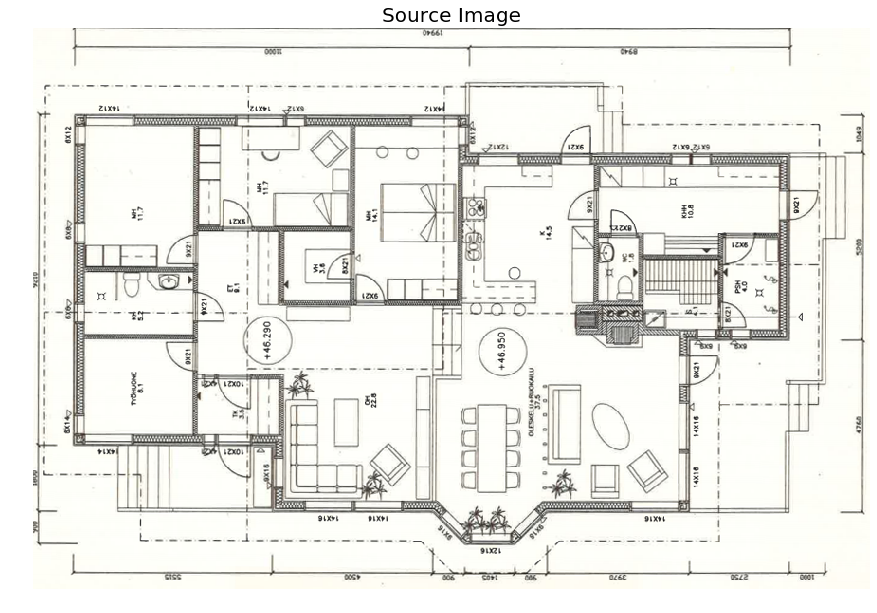

In [30]:
val = next(data_iter)
junctions = val['heatmaps']
folder = val['folder'][0]
image = val['image'].cuda()
label = val['label']
np_img = np.moveaxis(image[0].cpu().data.numpy(), 0, -1) / 2 + 0.5
#np_img = val['image']
plt.figure(figsize=(15,15))
plt.title('Source Image', fontsize=20)
plt.axis('off')
plt.imshow(np_img)
plt.show()

In [31]:
from IPython.display import SVG
from IPython.core.display import HTML 
import base64

def svg_fixed_width(svgf, width="200%"):
    with open(svgf, "r") as text_file:
        svg = text_file.read()
    #svg = base64.b64encode(bytes(svgb, 'utf-8'))
    #print(svg)
    _html_template='<img width="{}" src="data:image/svg+xml;base64,{}"/>'
    text = _html_template.format(width, svg)
    return HTML(text)

svg_fixed_width(data_folder+folder+"model.svg")
#SVG(data=data_folder+folder+"model.svg")

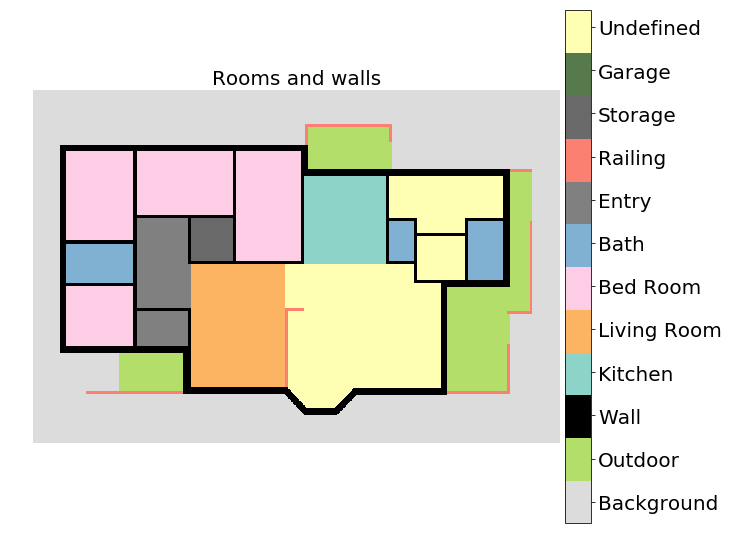

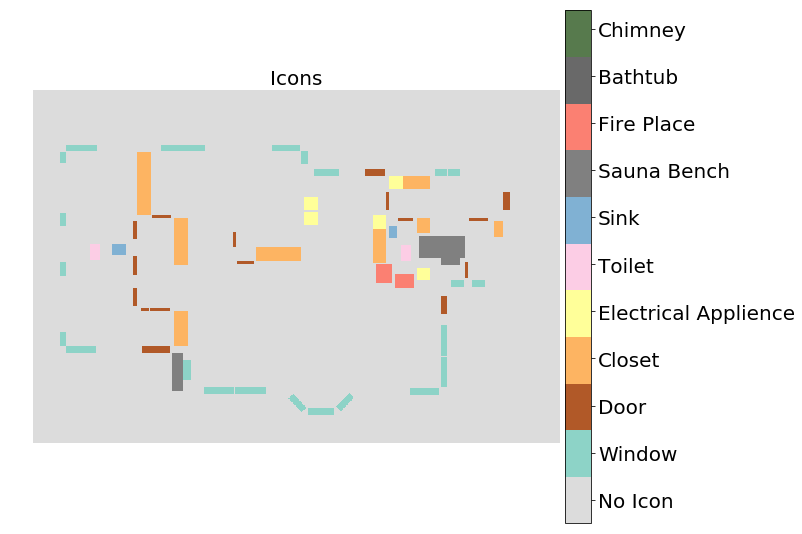

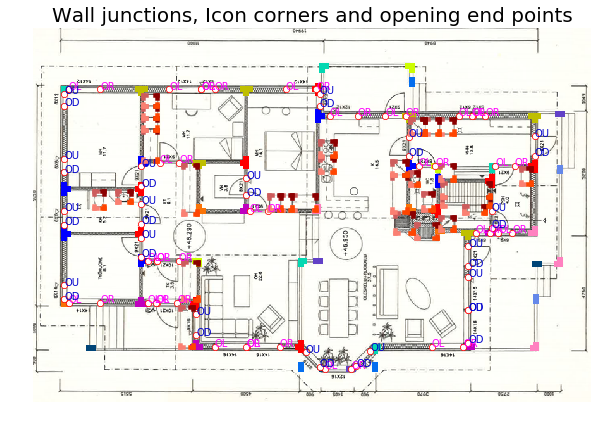

In [32]:
label_np = label.data.numpy()[0]
plt.figure(figsize=(10,10))
ax = plt.subplot(1, 1, 1)
plt.title('Rooms and walls', fontsize=20)
ax.axis('off')
n_rooms = 12
rseg = ax.imshow(label_np[0], cmap='rooms', vmin=0, vmax=n_rooms-0.1)
cbar = plt.colorbar(rseg, ticks=np.arange(n_rooms) + 0.5, fraction=0.046, pad=0.01)
cbar.ax.set_yticklabels(room_classes, fontsize=20)
plt.show()

plt.figure(figsize=(10,10))
ax = plt.subplot(1, 1, 1)
plt.title('Icons', fontsize=20)
ax.axis('off')
n_icons = 11
iseg = ax.imshow(label_np[1], cmap='icons', vmin=0, vmax=n_icons-0.1)
cbar = plt.colorbar(iseg, ticks=np.arange(n_icons) + 0.5, fraction=0.046, pad=0.01)
cbar.ax.set_yticklabels(icon_classes, fontsize=20)
plt.show()

plt.figure(figsize=(10,10))
ax = plt.subplot(1, 1, 1)
plt.title('Wall junctions, Icon corners and opening end points', fontsize=20)
ax.axis('off')
ax.imshow(np_img)
h, w, _ = np_img.shape
draw_junction_from_dict(junctions, w, h, size=0.3, fontsize=10)
plt.show()

### predictions for example

In [33]:
# Setup Model
model = get_model('hg_furukawa_original', 51)

n_classes = 44
split = [21, 12, 11]
model.conv4_ = torch.nn.Conv2d(256, n_classes, bias=True, kernel_size=1)
model.upsample = torch.nn.ConvTranspose2d(n_classes, n_classes, kernel_size=4, stride=4)
checkpoint = torch.load('./model_best_val_loss_var.pkl')

model.load_state_dict(checkpoint['model_state'])
model.eval()
model.cuda()
print("Model loaded.")

Model loaded.


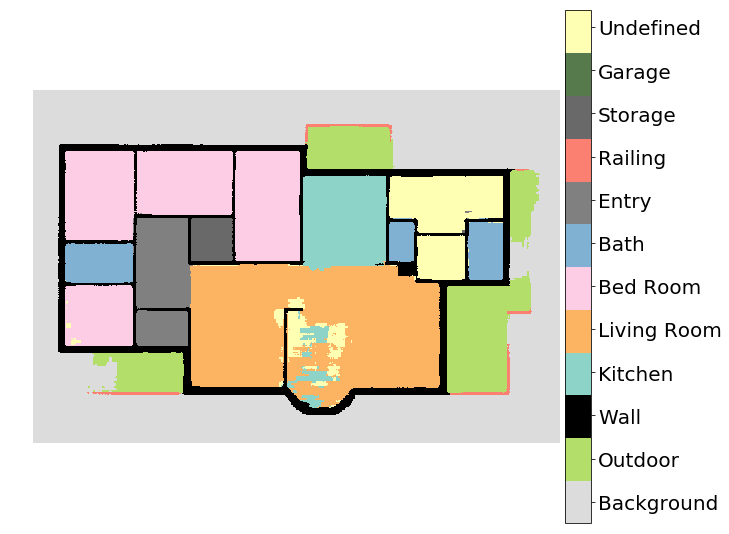

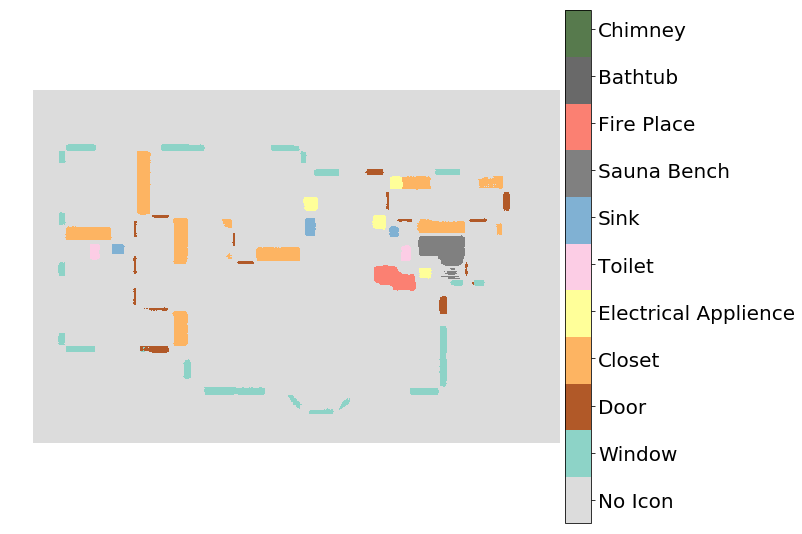

In [34]:
with torch.no_grad():
    height = label_np.shape[1]
    width = label_np.shape[2]
    img_size = (height, width)
    
    rotations = [(0, 0), (1, -1), (2, 2), (-1, 1)]
    pred_count = len(rotations)
    prediction = torch.zeros([pred_count, n_classes, height, width])
    for i, r in enumerate(rotations):
        forward, back = r
        # We rotate first the image
        rot_image = rot(image, 'tensor', forward)
        pred = model(rot_image)
        # We rotate prediction back
        pred = rot(pred, 'tensor', back)
        # We fix heatmaps
        pred = rot(pred, 'points', back)
        # We make sure the size is correct
        pred = F.interpolate(pred, size=(height, width), mode='bilinear', align_corners=True)
        # We add the prediction to output
        prediction[i] = pred[0]

prediction = torch.mean(prediction, 0, True)
rooms_label = label_np[0]
icons_label = label_np[1]

rooms_pred = F.softmax(prediction[0, 21:21+12], 0).cpu().data.numpy()
rooms_pred = np.argmax(rooms_pred, axis=0)

icons_pred = F.softmax(prediction[0, 21+12:], 0).cpu().data.numpy()
icons_pred = np.argmax(icons_pred, axis=0)

plt.figure(figsize=(10,10))
ax = plt.subplot(1, 1, 1)
ax.axis('off')
rseg = ax.imshow(rooms_pred, cmap='rooms', vmin=0, vmax=n_rooms-0.1)
cbar = plt.colorbar(rseg, ticks=np.arange(n_rooms) + 0.5, fraction=0.046, pad=0.01)
cbar.ax.set_yticklabels(room_classes, fontsize=20)
plt.show()

plt.figure(figsize=(10,10))
ax = plt.subplot(1, 1, 1)
ax.axis('off')
iseg = ax.imshow(icons_pred, cmap='icons', vmin=0, vmax=n_icons-0.1)
cbar = plt.colorbar(iseg, ticks=np.arange(n_icons) + 0.5, fraction=0.046, pad=0.01)
cbar.ax.set_yticklabels(icon_classes, fontsize=20)
plt.show()

### post processing

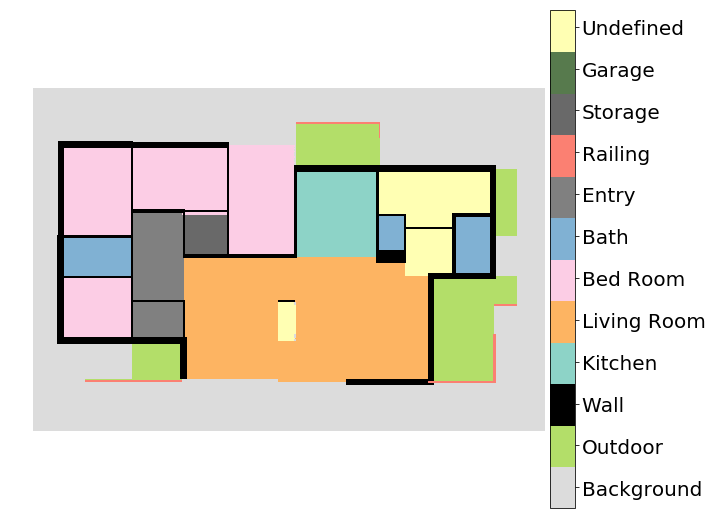

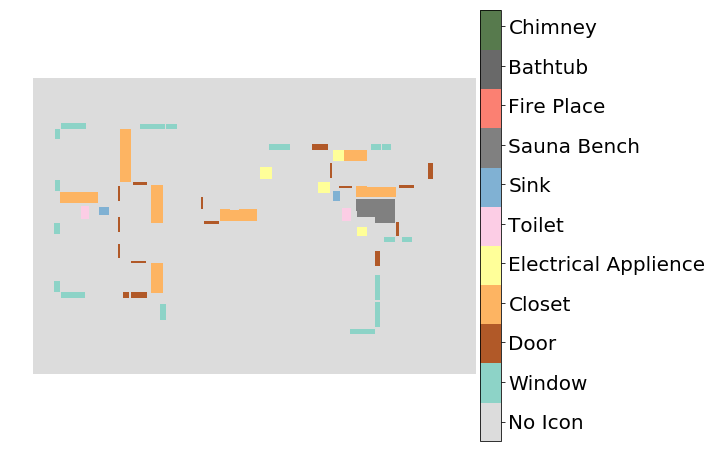

In [35]:
heatmaps, rooms, icons = split_prediction(prediction, img_size, split)
polygons, types, room_polygons, room_types = get_polygons((heatmaps, rooms, icons), 0.2, [1, 2])

pol_room_seg, pol_icon_seg = polygons_to_image(polygons, types, room_polygons, room_types, height, width)
plt.figure(figsize=(10,10))
ax = plt.subplot(1, 1, 1)
ax.axis('off')
rseg = ax.imshow(pol_room_seg, cmap='rooms', vmin=0, vmax=n_rooms-0.1)
cbar = plt.colorbar(rseg, ticks=np.arange(n_rooms) + 0.5, fraction=0.046, pad=0.01)
cbar.ax.set_yticklabels(room_classes, fontsize=20)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,10))
ax = plt.subplot(1, 1, 1)
ax.axis('off')
iseg = ax.imshow(pol_icon_seg, cmap='icons', vmin=0, vmax=n_icons-0.1)
cbar = plt.colorbar(iseg, ticks=np.arange(n_icons) + 0.5, fraction=0.046, pad=0.01)
cbar.ax.set_yticklabels(icon_classes, fontsize=20)
plt.tight_layout()
plt.show()

### Comparision between Actual and Predicted Segmentation

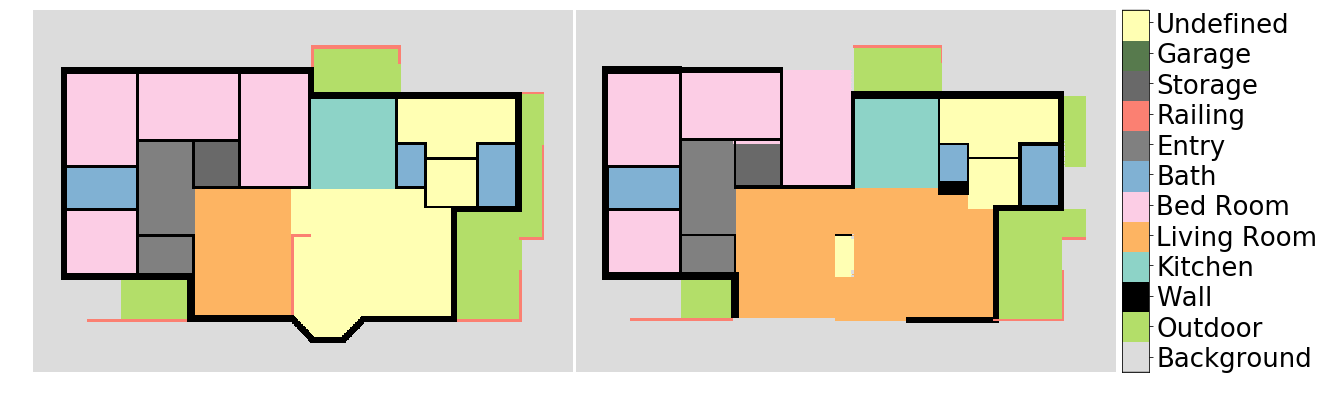

In [36]:
fig = plt.figure(figsize=(20, 12))
grid = AxesGrid(fig, 111,
                nrows_ncols=(1, 2),
                axes_pad=0.05,
                cbar_mode='single',
                cbar_location='right',
                cbar_pad=0.1
                )
images = [label_np[0], pol_room_seg]
for i, ax in enumerate(grid):
    ax.set_axis_off()
    im = ax.imshow(images[i], cmap='rooms', vmin=0, vmax=n_rooms-0.1)
cbar = ax.cax.colorbar(rseg, ticks=np.arange(n_rooms) + 0.5)
cbar.ax.set_yticklabels(room_classes, fontsize=26)
plt.show()

plt.imsave('./segmentation.png',images[0],format='png',cmap='rooms', vmin=0, vmax=n_rooms-0.1)
#np_img = np.moveaxis(image[0].cpu().data.numpy(), 0, -1) / 2 + 0.5
#np_img = val['image']
plt.imsave('./orig.png',np_img,format='png')


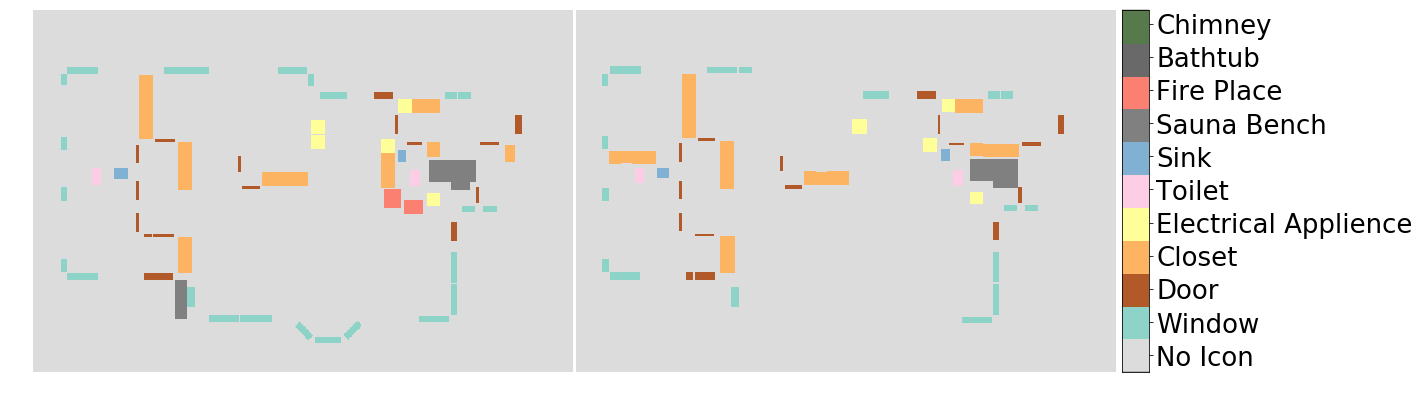

In [37]:
fig = plt.figure(figsize=(20, 12))
grid = AxesGrid(fig, 111,
                nrows_ncols=(1, 2),
                axes_pad=0.05,
                cbar_mode='single',
                cbar_location='right',
                cbar_pad=0.1
                )

images = [label_np[1], pol_icon_seg]
for i, ax in enumerate(grid):
    ax.set_axis_off()
    im = ax.imshow(images[i], cmap='icons', vmin=0, vmax=n_icons-0.1)

cbar = ax.cax.colorbar(iseg, ticks=np.arange(n_icons) + 0.5)
cbar.ax.set_yticklabels(icon_classes, fontsize=26)
plt.show()

### prepare data for sagemaker
now let's prepare masks from the svg files by using pol_room_seg ground truths for further segmentation models

### 

In [38]:
!rm -rf .{DATA_DIR}/sagemaker
!mkdir .{DATA_DIR}/sagemaker
!mkdir .{DATA_DIR}/sagemaker/masks
!mkdir .{DATA_DIR}/sagemaker/maskscolor
!mkdir .{DATA_DIR}/sagemaker/masksbw
!mkdir .{DATA_DIR}/sagemaker/masksgray
!mkdir .{DATA_DIR}/sagemaker/images
!mkdir .{DATA_DIR}/sagemaker/cubicasaresult

In [39]:
data_loader = DataLoader(normal_set, batch_size=1, num_workers=0)
data_iter = iter(data_loader)

In [40]:
from PIL import Image
import imageio
data_loader = DataLoader(normal_set, batch_size=1, num_workers=0)
data_iter = iter(data_loader)
i=0
def remove_transparency(im, bg_colour=(255, 255, 255)):

    # Only process if image has transparency 
    if im.mode in ('RGBA', 'LA') or (im.mode == 'P' and 'transparency' in im.info):

        # Need to convert to RGBA if LA format due to a bug in PIL 
        alpha = im.convert('RGBA').split()[-1]

        # Create a new background image of our matt color.
        # Must be RGBA because paste requires both images have the same format

        bg = Image.new("RGBA", im.size, bg_colour + (255,))
        bg.paste(im, mask=alpha)
        return bg

    else:
        return im
    
for val in data_iter:
    i = i + 1
    junctions = val['heatmaps']
    folder = val['folder'][0]
    image = val['image'].cuda()
    label = val['label']
    label_np = label.data.numpy()[0]
    height = label_np.shape[1]
    width = label_np.shape[2]
    img_size = (height, width)
    np_img = np.moveaxis(image[0].cpu().data.numpy(), 0, -1) / 2 + 0.5
    
    plt.imsave('.' + DATA_DIR + '/sagemaker/maskscolor/'+str(i)+'.png',label_np[0].astype(np.uint8),format='png',cmap='rooms', vmin=0, vmax=n_rooms-0.1)
    plt.imsave('.' + DATA_DIR + '/sagemaker/images/'+str(i)+'.jpg',np_img,format='jpg')
  
    # Load image and ensure it is 3-channel RGB...
    # ... not 1-channel greyscale, not 4-channel RGBA, not 1-channel palette
    im = Image.fromarray(label_np[0]).convert('RGB')
    # Make into Numpy array of RGB and get dimensions
    RGB = np.array(im)
    h, w = RGB.shape[:2]

    # Add an alpha channel, fully opaque (255)
    RGBA = np.dstack((RGB, np.zeros((h,w),dtype=np.uint8)+255))

    # Make mask of black pixels - mask is True where image is black
    mBlack = (RGBA[:, :, 0:3] != [0,0,0]).all(2)

    # Make all pixels matched by mask into transparent ones
    RGBA[mBlack] = (0,0,0,0)

    imageio.imsave('.' + DATA_DIR + '/sagemaker/masksbw/'+str(i)+'.png', RGBA.astype(np.uint8))
    img = Image.open('.' + DATA_DIR + '/sagemaker/masksbw/'+str(i)+'.png')
    npimg = np.array(img)
    maskimage = Image.fromarray(npimg.astype(np.uint8))
    im = remove_transparency(img).convert('L')
    im.save('.' + DATA_DIR + '/sagemaker/masks/'+str(i)+'.png') 

note if you get a cuda out of memory error happes, shut some other notebook sessions down

## upload backup of prepared training data to s3 mainly for backup

In [45]:
cd ..

/home/ec2-user/SageMaker/sagemaker-floorplans


In [46]:
%%time
import sagemaker
from sagemaker import get_execution_role

role = get_execution_role()
print(role)
sess = sagemaker.Session()
bucket = sess.default_bucket()  
bucket_prefix = 'floorplans_cubicasa5k'

arn:aws:iam::308537982265:role/service-role/AmazonSageMaker-ExecutionRole-20200212T095321
CPU times: user 252 ms, sys: 46.2 ms, total: 298 ms
Wall time: 395 ms


In [47]:
sess.upload_data(path=DATA_DIR+'/sagemaker', bucket=bucket, key_prefix=bucket_prefix)

's3://sagemaker-us-east-2-308537982265/floorplans_cubicasa5k'